### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

**The independent variable: is the list congruent or incongruent.**

**The dependent variable: the time it takes to name the ink colors in equally-sized lists.**

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

**I think we have two reasonable options here:**

**I. The more cautious hypothesis is when we don't have any preconception about the direction of difference between the average time needed for the congruent and incongruent list. This case we would like to see, if there is a statistically significant difference between the average times at all. Here we need a two-tail test.**

$$H_0: \mu_{congruent} = \mu_{incongruent}$$

$$H_1: \mu_{congruent} \neq \mu_{incongruent}$$

**II. I don't have experience with the Stroop Effect, but from what I read, I assume that the average time for the incongruent list will be longer than the average time for the congruent list. So I want to prove this, this is going to be my alternative hypothesis H1. Here we need a one-tail test.**

$$H_0: \mu_{congruent} >= \mu_{incongruent}$$

$$H_1: \mu_{congruent} < \mu_{incongruent}$$


(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# Perform the analysis here
import numpy as np
import pandas as pd
from scipy.stats import iqr
import matplotlib.pyplot as plt

df = pd.read_csv('stroopdata.csv')
print(df.shape)
df.head()

(24, 2)


,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [2]:
print(df.values.flatten().mean())
print(df['Congruent'].mean())
print(df['Incongruent'].mean())
print(df['Congruent'].median())
print(df['Incongruent'].median())
print(df['Congruent'].std())
print(df['Incongruent'].std())
print(iqr(df['Congruent']))
print(iqr(df['Incongruent']))


18.0335208333
14.051125
22.0159166667
14.3565
21.0175
3.55935795765
4.79705712247
4.3055
5.33475


Mean of the time spent regardless of group: 18.0335208333<br>
Congruent mean: 14.051125<br>
Incongruent mean: 22.0159166667<br>
Congruent median: 14.3565<br>
Incongruent median: 21.0175<br>
Congruent standard deviation: 3.55935795765<br>
Incongruent standard deviation: 4.79705712247<br>
Congruent interquartile range: 4.3055<br>
Incongruent interquartile range: 5.33475<br>

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

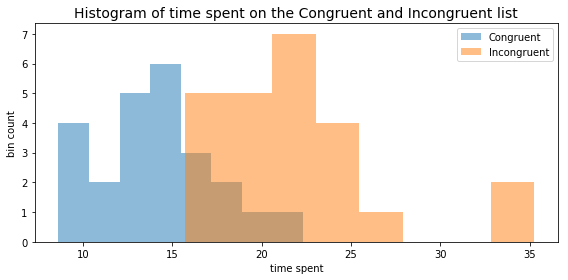

In [3]:
fig, ax1 = plt.subplots(figsize=(8,4))

ax1.hist(df['Congruent'], alpha=0.5, bins=8)
ax1.hist(df['Incongruent'], alpha=0.5, bins=8)

ax1.set_xlabel('time spent')
ax1.set_ylabel('bin count')
ax1.set_title('Histogram of time spent on the Congruent and Incongruent list', fontsize=14)
ax1.legend()
fig.tight_layout()

**We can see in the histograms that a large part of the congruent group needed less time to finish the test than the fastest ones in the incongruent group. The slowest ones are in the incongruent group. It is hard to decide if the distributions are symmetric or not, we would need more data.**

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [4]:
# bootstrap new samples
congruent_simulation = np.random.choice(df['Congruent'], size=(24,10000), replace=True)
incongruent_simulation = np.random.choice(df['Incongruent'], size=(24,10000), replace=True)
# find the sample means
congruent_means = congruent_simulation.mean(axis=0)
incongruent_means = incongruent_simulation.mean(axis=0)
# calculate the difference of the means
mean_diff = incongruent_means - congruent_means
# calculate the difference in the original data
obs_diff = df['Incongruent'].mean() - df['Congruent'].mean() 

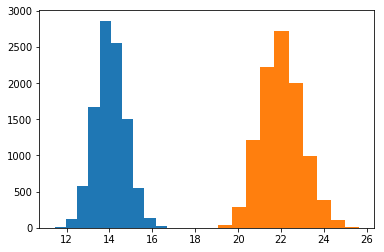

In [5]:
# without calculating the p value the difference is obvious, the distributions of mean values are far from each other
plt.hist(congruent_means);
plt.hist(incongruent_means);

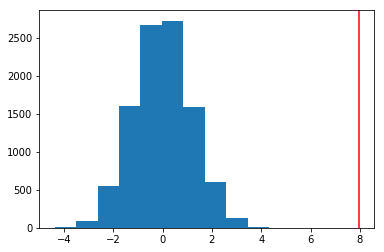

In [6]:
# the distribution of the null hypothesis and the observed difference between the means (red line)
null_values = np.random.normal(loc=0, scale=np.std(mean_diff),size=10000)
plt.hist(null_values);
plt.axvline(obs_diff, color='red');

In [7]:
p_value = (null_values > obs_diff).mean()
p_value

0.0

**Inspecting the chart "Histogram of time spent on the Congruent and Incongruent list" I presume that the mean time for the Incongruent group is larger than the mean time for the Congruent group, so my hypothesis:**
$$H_0: \mu_{congruent} >= \mu_{incongruent}$$

$$H_1: \mu_{congruent} < \mu_{incongruent}$$
**Here H1 is the alternative hypothesis.**

**I chose bootstraping for the hypothesis test. With a t-test my p-value wouldn't be zero but would be a very small value as well. Here my confidence level is 100%. And if the null hypothesis is true, there is 0.0 percent (p-value) chance to have as large or larger difference in the means than the observed difference of means, so we reject the null hypothesis. We can say that the average time for the incongruent group is larger than the average time for the congruent.**

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

**I tried out the test, and at first, it is hard to find out the correct answer fast. My brain focused more on the text and not on the color. Later someone can develop a technic to focus only on the color, but I think without experience we need an extra effort to neglect the text, and this needs extra time. 
A similar test for the hearing could be the following: Somebody is reading words: low, faint, quiet, still vs loud, noisy, strong. But the words are randomly loud or quite. So we have to choose not the meaning, but the loudness. Maybe this would be easier than the text/colors version, but I think this would result some mean time difference as well.**